In [37]:
import os
from datetime import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
from alpaca_trade_api.rest import REST, TimeFrame
import alpaca_trade_api as tradeapi

load_dotenv()

True

In [2]:
PUBLIC_API_KEY = os.environ.get('PUBLIC_API_KEY')
PRIVATE_API_KEY = os.environ.get('PRIVATE_API_KEY')
APCA_API_PAPER_URL = os.environ.get('APCA_API_PAPER_URL')
api = tradeapi.REST(PUBLIC_API_KEY, PRIVATE_API_KEY, APCA_API_PAPER_URL)
account = api.get_account()

In [4]:
def get_bars(symbol):
    data = api.get_barset(symbol, 'day', limit=1000)
    data = data.df[symbol]['close']
    return data

def correlation(equity_list):
    df = pd.DataFrame()
    equity_columns = []
    for symbol in equity_list:
        try:
            symbol_df = get_bars(symbol)
            df = pd.concat([df, symbol_df], axis=1)
            equity_columns.append(symbol)
        except:
            print(f'Exception: {symbol}')

    df.columns = equity_columns
    sum_corr = abs(df.corr()).sum().sort_values().index.values
    return df[sum_corr].corr()

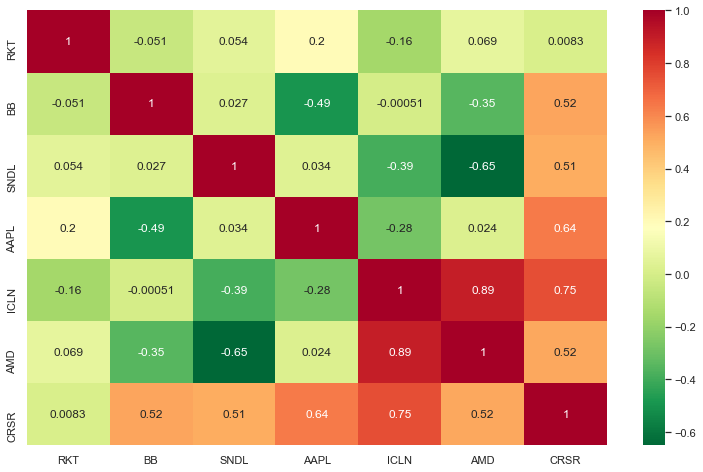

In [86]:
pos_list = [x.symbol for x in api.list_positions()]
order_list = [x.symbol for x in api.list_orders()]

# plotting
sns.set_theme()
plt.figure(figsize=(13,8))
sns.heatmap(data=correlation(pos_list), annot=True, cmap="RdYlGn_r");